<a href="https://colab.research.google.com/github/Anudeepsadda/Robotic-Vision-Detection-and-6D-Pose/blob/main/Real_Time_Vision_Based_Object_Detection_and_6D_Pose_Estimation_for_Robotic_Assembly_in_Aircraft_Manufacturing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d walidguirat/industrial-object-detection

Dataset URL: https://www.kaggle.com/datasets/walidguirat/industrial-object-detection
License(s): unknown
 64% 128M/199M [00:00<00:00, 1.34GB/s]
100% 199M/199M [00:00<00:00, 1.02GB/s]


In [3]:
!unzip industrial-object-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_178_jpg.rf.f2205740f9bccf6950fce4ee5705d5e1.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_17_jpg.rf.05acbf6c9629e40ace90696dff700668.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_181_jpg.rf.d5ae79fec9e014ec6fdb88b0fc2d90da.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_184_jpg.rf.33ea687db0986e60d2cf19287da34779.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_185_jpg.rf.c2871d6412e2496ad97545bac2c50557.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_186_jpg.rf.c97c1687fc3641339dd6965b54dc8066.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_187_jpg.rf.892ff489381852857429d7a208c68617.txt  
  inflating: Industrial Objects.v2i.yolov5pytorch/train/labels/image_188_jpg.rf.9de0216684a19d4f8f7e2e03691963dc.txt 

In [4]:
import os
print(os.listdir())

['.config', 'industrial-object-detection.zip', 'Industrial Objects.v3i.yolov5pytorch', 'Industrial Objects.v2i.yolov5pytorch', 'sample_data']


In [5]:
import os

base_path = "Industrial Objects.v2i.yolov5pytorch"
print(os.listdir(base_path))

['train', 'README.dataset.txt', 'test', 'data.yaml', 'valid', 'README.roboflow.txt']


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

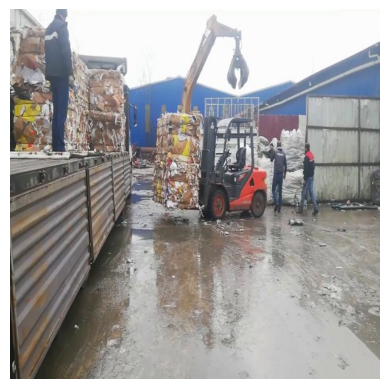

In [6]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("Industrial Objects.v2i.yolov5pytorch/train/images/" +
                 os.listdir("Industrial Objects.v2i.yolov5pytorch/train/images")[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")

In [7]:
label_file = os.listdir("Industrial Objects.v2i.yolov5pytorch/train/labels")[0]
with open(f"Industrial Objects.v2i.yolov5pytorch/train/labels/{label_file}") as f:
    print(f.readline())

0 0.434375 0.5203125 0.2859375 0.51640625


In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.7 MB/s eta 0:00:00


In [9]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
print("YOLOv8 model loaded successfully")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 model loaded successfully


In [10]:
model.train(
    data="Industrial Objects.v2i.yolov5pytorch/data.yaml",
    epochs=20,
    imgsz=640
)

Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Industrial Objects.v2i.yolov5pytorch/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79161fd8c890>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [11]:
model = YOLO("runs/detect/train/weights/best.pt")

model.predict(
    source="Industrial Objects.v2i.yolov5pytorch/test/images",
    save=True
)


image 1/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/052IJLOWFGWF_jpg.rf.612b0cccdf03bbfefc86e575a649be63.jpg: 640x640 1 0, 8.6ms
image 2/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/0J1QKF0HYLEZ_jpg.rf.5c2c985736ac03dc4e59b0d538f6bf9e.jpg: 640x640 1 0, 13.8ms
image 3/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/1Z2J2ECZ7K49_jpg.rf.a4dff1c1b09348705adbe1be3701df95.jpg: 640x640 1 0, 11.2ms
image 4/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/26AJCLLVBKTB_jpg.rf.c85703ce4042fb493d54571d50cf4fc1.jpg: 640x640 1 0, 13.5ms
image 5/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/3L0H5SMWSJOU_jpg.rf.520048ec79d105588a7e11170c331d62.jpg: 640x640 1 0, 10.3ms
image 6/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/3LNE4KW8JIA4_jpg.rf.5d961ef897053d7367804754c1632e6d.jpg: 640x640 1 0, 13.2ms
image 7/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/6OV3JZN7K67E_jpg.rf.cba9208bd3a28003291d94

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3'}
 obb: None
 orig_img: array([[[153, 118, 108],
         [154, 119, 109],
         [155, 120, 110],
         ...,
         [147, 111,  95],
         [146, 110,  94],
         [146, 110,  94]],
 
        [[153, 118, 108],
         [154, 119, 109],
         [156, 121, 111],
         ...,
         [148, 112,  96],
         [147, 111,  95],
         [146, 110,  94]],
 
        [[154, 119, 109],
         [155, 120, 110],
         [156, 121, 111],
         ...,
         [148, 112,  96],
         [148, 112,  96],
         [147, 111,  95]],
 
        ...,
 
        [[ 56,  51,  52],
         [ 58,  53,  54],
         [ 59,  54,  55],
         ...,
         [ 61,  49,  47],
         [ 59,  47,  45],
         [ 59,  47,  45]],
 
        [[ 57,  51,  52],
         [ 58,  52,  53],
         [ 60,  54,  55],
         ...,

In [15]:
!git clone https://github.com/abewley/sort.git

Cloning into 'sort'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 208 (delta 45), reused 40 (delta 40), pack-reused 159 (from 1)
Receiving objects: 100% (208/208), 1.20 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [16]:
!pip install filterpy scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=1e9b3a5c6582c56eebc92d908871251f6634db16e534bdb9b8ec5a5042f25f2c
  Stored in directory: /root/.cache/pip/wheels/77/bf/4c/b0c3f4798a0166668752312a67118b27a3cd341e13ac0ae6ee
Successfully built filterpy


In [23]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")
print("Model loaded")

Model loaded


In [24]:
model.track(
    source="Industrial Objects.v2i.yolov5pytorch/test/images",
    tracker="bytetrack.yaml",
    save=True
)

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 2 packages in 142ms
Prepared 1 package in 31ms
Installed 1 package in 3ms
 + lap==0.5.12

requirements: AutoUpdate success ✅ 0.9s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


image 1/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/052IJLOWFGWF_jpg.rf.612b0cccdf03bbfefc86e575a649be63.jpg: 640x640 1 0, 8.2ms
image 2/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/0J1QKF0HYLEZ_jpg.rf.5c2c985736ac03dc4e59b0d538f6bf9e.jpg: 640x640 1 0, 7.8ms
image 3/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/1Z2J2ECZ7K49_jpg.rf.a4dff1c1b09348705adbe1be3701df95.jpg: 640x640 1 0, 9.8ms
image 4/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/26AJCLLVBKTB_jpg.rf.c85703ce4042fb493d54571d50cf4fc1.jpg: 640x640 1 0, 9.0ms
image 5/118 /content/Industrial Objects.v2i.yolov5pyto

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3'}
 obb: None
 orig_img: array([[[153, 118, 108],
         [154, 119, 109],
         [155, 120, 110],
         ...,
         [147, 111,  95],
         [146, 110,  94],
         [146, 110,  94]],
 
        [[153, 118, 108],
         [154, 119, 109],
         [156, 121, 111],
         ...,
         [148, 112,  96],
         [147, 111,  95],
         [146, 110,  94]],
 
        [[154, 119, 109],
         [155, 120, 110],
         [156, 121, 111],
         ...,
         [148, 112,  96],
         [148, 112,  96],
         [147, 111,  95]],
 
        ...,
 
        [[ 56,  51,  52],
         [ 58,  53,  54],
         [ 59,  54,  55],
         ...,
         [ 61,  49,  47],
         [ 59,  47,  45],
         [ 59,  47,  45]],
 
        [[ 57,  51,  52],
         [ 58,  52,  53],
         [ 60,  54,  55],
         ...,

In [25]:
!pip install opencv-contrib-python

In [45]:
import cv2
import numpy as np

aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)

marker_id = 0
marker_size_px = 400

marker = cv2.aruco.generateImageMarker(aruco_dict, marker_id, marker_size_px)

# Add white border (important!)
border = 50
marker_with_border = cv2.copyMakeBorder(
    marker,
    border, border, border, border,
    cv2.BORDER_CONSTANT,
    value=255
)

cv2.imwrite("marker.png", marker_with_border)
print("Marker created with border")

Marker created with border


In [46]:
img = cv2.imread("marker.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)

corners, ids, rejected = detector.detectMarkers(gray)

print("Marker IDs:", ids)

Marker IDs: [[0]]


In [47]:
h, w = img.shape[:2]

camera_matrix = np.array([
    [800, 0, w/2],
    [0, 800, h/2],
    [0,   0,   1]
], dtype=np.float32)

dist_coeffs = np.zeros((5,1))

In [48]:
marker_size = 0.05  # 5 cm

obj_points = np.array([
    [-marker_size/2,  marker_size/2, 0],
    [ marker_size/2,  marker_size/2, 0],
    [ marker_size/2, -marker_size/2, 0],
    [-marker_size/2, -marker_size/2, 0]
], dtype=np.float32)

In [49]:
img_points = corners[0].reshape(4,2)

In [50]:
success, rvec, tvec = cv2.solvePnP(
    obj_points,
    img_points,
    camera_matrix,
    dist_coeffs
)

print("Rotation vector:", rvec)
print("Translation vector:", tvec)

Rotation vector: [[     3.1416]
 [-3.2909e-23]
 [ 1.4995e-11]]
Translation vector: [[-6.2657e-05]
 [-6.2657e-05]
 [    0.10025]]


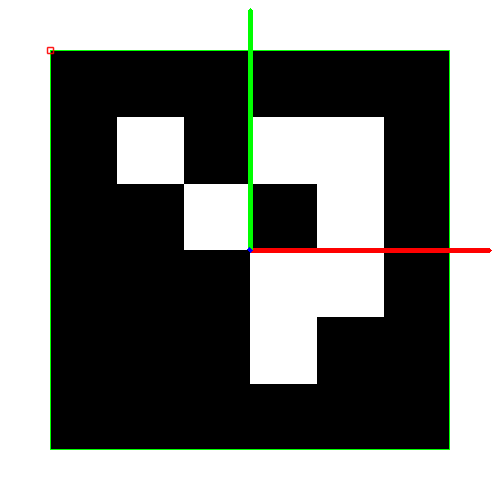

In [51]:
out = img.copy()
cv2.aruco.drawDetectedMarkers(out, corners)
cv2.drawFrameAxes(out, camera_matrix, dist_coeffs,
                  rvec, tvec, 0.03)

from google.colab.patches import cv2_imshow
cv2_imshow(out)

In [52]:
import time
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

start = time.time()
model.predict(source="Industrial Objects.v2i.yolov5pytorch/test/images", save=False)
end = time.time()

print("Total time:", end - start)


image 1/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/052IJLOWFGWF_jpg.rf.612b0cccdf03bbfefc86e575a649be63.jpg: 640x640 1 0, 14.3ms
image 2/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/0J1QKF0HYLEZ_jpg.rf.5c2c985736ac03dc4e59b0d538f6bf9e.jpg: 640x640 1 0, 7.3ms
image 3/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/1Z2J2ECZ7K49_jpg.rf.a4dff1c1b09348705adbe1be3701df95.jpg: 640x640 1 0, 7.3ms
image 4/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/26AJCLLVBKTB_jpg.rf.c85703ce4042fb493d54571d50cf4fc1.jpg: 640x640 1 0, 19.4ms
image 5/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/3L0H5SMWSJOU_jpg.rf.520048ec79d105588a7e11170c331d62.jpg: 640x640 1 0, 20.1ms
image 6/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/3LNE4KW8JIA4_jpg.rf.5d961ef897053d7367804754c1632e6d.jpg: 640x640 1 0, 25.0ms
image 7/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/6OV3JZN7K67E_jpg.rf.cba9208bd3a28003291d945

In [53]:
num_images = len(os.listdir("Industrial Objects.v2i.yolov5pytorch/test/images"))
fps = num_images / (end - start)
print("FPS:", round(fps, 2))

FPS: 37.78


In [54]:
model.export(format="onnx")

Ultralytics 8.4.0 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 73 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 284ms
Prepared 6 packages in 8.00s
Installed 6 packages in 257ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.20.1
 + onnxruntime-gpu==1.23.2
 + onnxslim==0.1.82

requirements: AutoUpdate success ✅ 9.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with o

/usr/local/lib/python3.12/dist-packages/torch/onnx/_internal/torchscript_exporter/utils.py:1447: OnnxExporterWarning: Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 
  warnings.warn(


ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 10.3s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (10.9s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=Industrial Objects.v2i.yolov5pytorch/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'

In [56]:
from ultralytics import YOLO

model_onnx = YOLO("runs/detect/train/weights/best.onnx")

model_onnx.predict(
    source="Industrial Objects.v2i.yolov5pytorch/test/images",
    save=True
)

Loading runs/detect/train/weights/best.onnx for ONNX Runtime inference...
Using ONNX Runtime 1.23.2 with CUDAExecutionProvider

image 1/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/052IJLOWFGWF_jpg.rf.612b0cccdf03bbfefc86e575a649be63.jpg: 640x640 1 0, 292.3ms
image 2/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/0J1QKF0HYLEZ_jpg.rf.5c2c985736ac03dc4e59b0d538f6bf9e.jpg: 640x640 1 0, 208.6ms
image 3/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/1Z2J2ECZ7K49_jpg.rf.a4dff1c1b09348705adbe1be3701df95.jpg: 640x640 1 0, 218.9ms
image 4/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/26AJCLLVBKTB_jpg.rf.c85703ce4042fb493d54571d50cf4fc1.jpg: 640x640 1 0, 214.9ms
image 5/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/3L0H5SMWSJOU_jpg.rf.520048ec79d105588a7e11170c331d62.jpg: 640x640 1 0, 224.2ms
image 6/118 /content/Industrial Objects.v2i.yolov5pytorch/test/images/3LNE4KW8JIA4_jpg.rf.5d961ef897053d7367804754c1632e6d.jpg:

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3'}
 obb: None
 orig_img: array([[[153, 118, 108],
         [154, 119, 109],
         [155, 120, 110],
         ...,
         [147, 111,  95],
         [146, 110,  94],
         [146, 110,  94]],
 
        [[153, 118, 108],
         [154, 119, 109],
         [156, 121, 111],
         ...,
         [148, 112,  96],
         [147, 111,  95],
         [146, 110,  94]],
 
        [[154, 119, 109],
         [155, 120, 110],
         [156, 121, 111],
         ...,
         [148, 112,  96],
         [148, 112,  96],
         [147, 111,  95]],
 
        ...,
 
        [[ 56,  51,  52],
         [ 58,  53,  54],
         [ 59,  54,  55],
         ...,
         [ 61,  49,  47],
         [ 59,  47,  45],
         [ 59,  47,  45]],
 
        [[ 57,  51,  52],
         [ 58,  52,  53],
         [ 60,  54,  55],
         ...,

In [57]:
!pip install streamlit pyngrok ultralytics opencv-python pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 141.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.9 MB/s eta 0:00:00


In [58]:
from pyngrok import ngrok

ngrok.set_auth_token("35ocFCGswjdtu5gQreRptSFvPqw_3L4mbteBwSsHzUyjF6uS2")

In [59]:
%%writefile app.py
import streamlit as st
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image

st.set_page_config(page_title="Robotic Vision System", layout="centered")

st.title("🤖 Airbus Robotics Vision Demo")
st.write("Object Detection using YOLO + Optimized Model")

# Load model
MODEL_PATH = "runs/detect/train/weights/best.onnx"
model = YOLO(MODEL_PATH)

uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert("RGB")
    img_np = np.array(image)

    st.image(image, caption="Uploaded Image", use_column_width=True)

    if st.button("Run Detection"):
        results = model.predict(img_np)

        annotated = results[0].plot()
        st.image(annotated, caption="Prediction Result", use_column_width=True)

Writing app.py


In [61]:
public_url = ngrok.connect(8501)
print("🌍 Public URL:", public_url)

🌍 Public URL: NgrokTunnel: "https://elanor-skeptical-unfiscally.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://136.110.19.250:8501

2026-01-14 15:39:12.190 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `width` parameter instead.
2026-01-14 15:39:18.371 The `use_column_width` parameter has been deprecated and will be removed in a future release. Please utilize the `width` parameter instead.
Loading runs/detect/train/weights/best.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 9 packages in 75ms
Prepared 1 package in 232ms
Installed 1 package in 81ms
 + onnxruntime==1.23.2

requirements: AutoUpdate success ✅ 0.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect

Using ONNX Runtime 1.23.2 with CPUExecutionProvider

0: